# Texture

In [1]:
import numpy as np
import cv2
from skimage import io, color
from skimage.feature import graycomatrix
from matplotlib import pyplot as plt
from ipywidgets import interact,interactive
import ipywidgets as widgets

## Gray Level Co-Occurrence Matrix (GLCM) => Represent Texture

A gray level co-occurrence Matrix is a matrix that is defined over an image to be the distribution of co-occurring pixel values at a given offset. It is used as an approach to texture analysis with various computer vision applications.



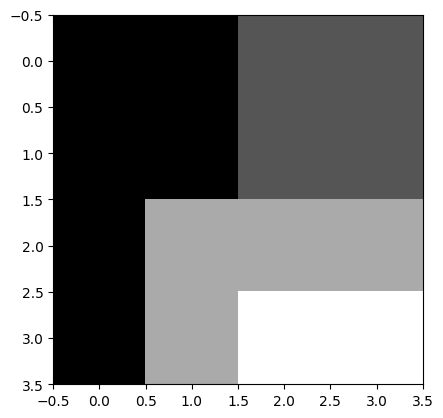

In [2]:
patternImage = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 2, 2, 2],
    [0, 2, 3, 3]], dtype=np.uint8)

plt.imshow(patternImage, cmap='gray')
plt.show()

In [4]:
co_ocmatrix = graycomatrix(patternImage, distances=[1], angles=[0, np.pi/4, np.pi/2], levels=4)
print(co_ocmatrix.shape)
#แนวนอน
print('angle 0')
print(co_ocmatrix[:,:,0,0])
#แนวทแยง
print('angle 45')
print(co_ocmatrix[:,:,0,1])
#แนวตั้ง
print('angle 90')
print(co_ocmatrix[:,:,0,2])

(4, 4, 1, 3)
angle 0
[[2 2 2 0]
 [0 2 0 0]
 [0 0 2 1]
 [0 0 0 1]]
angle 45
[[1 1 3 0]
 [0 1 1 0]
 [0 0 0 2]
 [0 0 0 0]]
angle 90
[[4 0 1 0]
 [0 2 2 0]
 [0 0 1 2]
 [0 0 0 0]]


##Co-Occurrence matrix patch matching on bridge defect problem

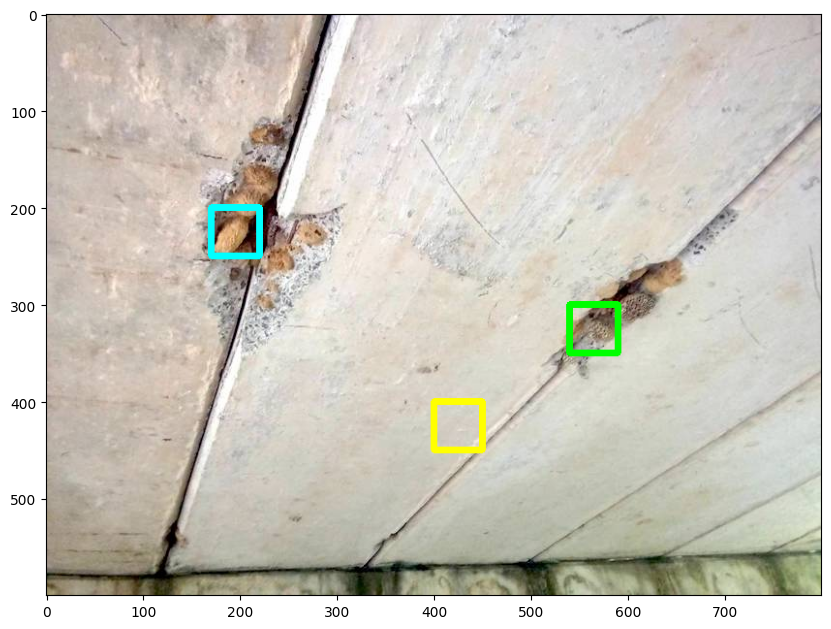

In [5]:
bridgeDefectImage = cv2.imread('crack.jpg')
dispImage = cv2.cvtColor(bridgeDefectImage, cv2.COLOR_BGR2RGB)

# Sample crack
cv2.rectangle(dispImage, (170,200), (220,250), (0,255,255), 5)

# Normal1
cv2.rectangle(dispImage, (400,400), (450,450), (255,255,0), 5)

# Crack2
cv2.rectangle(dispImage, (540,300), (590,350), (0,255,0), 5)


plt.figure(figsize=(10,10))
plt.imshow(dispImage, cmap='gray')

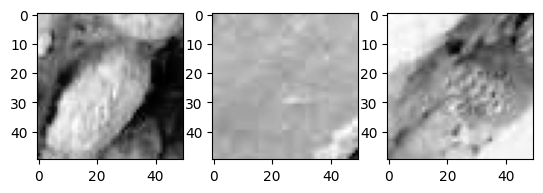

In [6]:
bridgeDefectImageGray = cv2.cvtColor(bridgeDefectImage, cv2.COLOR_BGR2GRAY)

crackPatch1 = bridgeDefectImageGray[200:250,170:220]

normalPatch1= bridgeDefectImageGray[400:450,400:450]

crackPatch2 = bridgeDefectImageGray[300:350,540:590]

_, axarr = plt.subplots(1,3)
axarr[0].imshow(crackPatch1, cmap='gray')
axarr[1].imshow(normalPatch1, cmap='gray')
axarr[2].imshow(crackPatch2, cmap='gray')

In [7]:
co_ocmatrix_crackpatch1 = graycomatrix(crackPatch1, distances=[1], angles=[0, np.pi/4, np.pi/2], symmetric=True, normed=True)

co_ocmatrix_normalpatch1 = graycomatrix(normalPatch1, distances=[1], angles=[0, np.pi/4, np.pi/2], symmetric=True, normed=True)

co_ocmatrix_crackpatch2 = graycomatrix(crackPatch2, distances=[1], angles=[0, np.pi/4, np.pi/2], symmetric=True, normed=True)

In [8]:
dist_normal_normal = np.linalg.norm(co_ocmatrix_crackpatch1-co_ocmatrix_crackpatch2)
print('distance crack-crack', dist_normal_normal)

dist_normal_crack = np.linalg.norm(co_ocmatrix_crackpatch1-co_ocmatrix_normalpatch1)
print('distance normal-crack', dist_normal_crack)

distance crack-crack 0.04674394760128211
distance normal-crack 0.1884948283571507


# Edge detection

import image

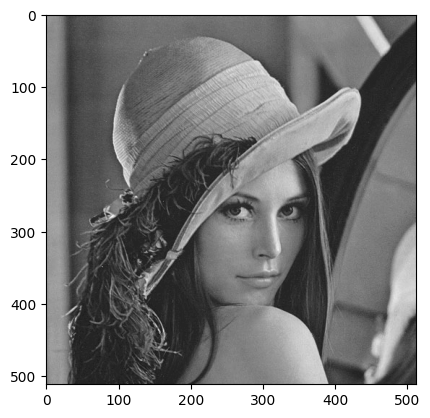

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Lena image in grayscale
lena = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena, cmap='gray')

Define Prewitt mask, Sobel mask, and Roberts mask

In [12]:
# Prewitt Mask
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]])

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

# Sobel Mask
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Roberts Mask
roberts_x = np.array([[1, 0],
                      [0, -1]])

roberts_y = np.array([[0, 1],
                      [-1, 0]])

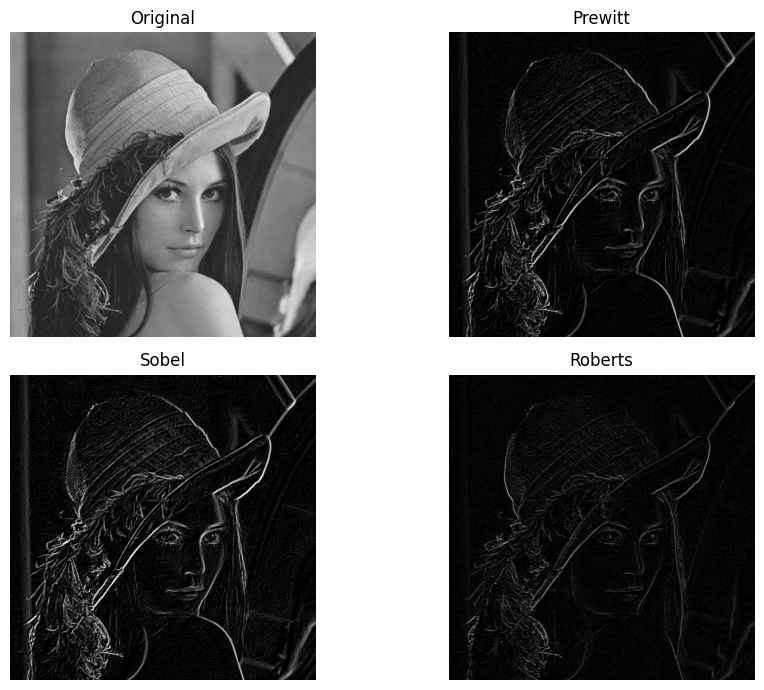

In [13]:
# Apply filters
def apply_filter(image, kernel_x, kernel_y):
    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)
    gradient = cv2.magnitude(grad_x.astype(np.float32), grad_y.astype(np.float32))
    return gradient

prewitt = apply_filter(lena, prewitt_x, prewitt_y)
sobel = apply_filter(lena, sobel_x, sobel_y)
roberts = apply_filter(lena, roberts_x, roberts_y)

# Plot results
titles = ['Original', 'Prewitt', 'Sobel', 'Roberts']
images = [lena, prewitt, sobel, roberts]

plt.figure(figsize=(10, 7))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()